# CSC-6260 Final Project: Smart Taxi
Authors: Sharna Sanjida, Chern Chao Tai

Instructor: Amr Hilal


In [8]:
!pip install gym==0.17.3

Import libraries necessary for the environment.

In [9]:
import time
import matplotlib.pyplot as plt
import gym
import numpy as np
from IPython.display import clear_output

In [10]:
env = gym.make('Taxi-v3')

In [11]:
env.reset()

472

# Implementation of the SARSA Algorithm

Streaming output truncated to the last 5000 lines.
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
Step: 3 Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step: 4 Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
Step: 5 Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
Step: 6 Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y| : |B: |
+---------+
  (North)
Step: 7 Reward: -1
+---------+
|R: | : :G|
| : | : : |
|_: : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step: 8 Reward: -1
+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step: 9 Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
Step: 10 Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+-------

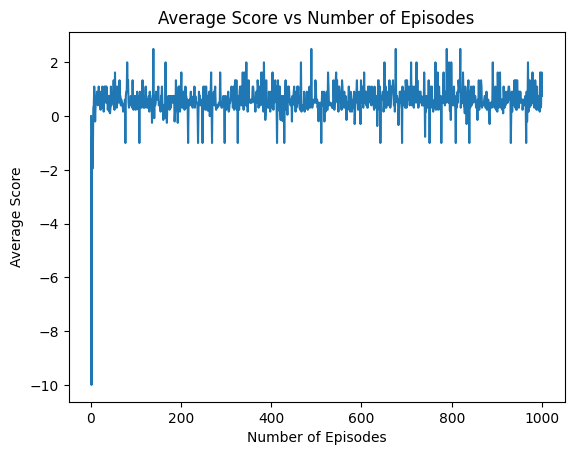

(array([[  0.        ,   0.        ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [ -7.87980013,  -6.96633   ,  -7.92732516,  -6.98949169,
          -6.03891209, -15.94599974],
        [ 11.79781771,  12.9114923 ,  11.79509496,  12.92496678,
          14.06725437,   3.92650054],
        ...,
        [  3.98397942,   8.17159215,   0.23387472,  -0.7613859 ,
          -5.24383066, -11.32318695],
        [  0.28785472,   2.12785886,  -2.93517976,   5.43885792,
          -7.26653592,  -8.68585275],
        [ -1.87003906,  -1.7965625 ,   2.42176562,  12.62863276,
         -10.07109375,  -6.52339063]]),
 0.5981426357517612)

In [12]:
import gym
import numpy as np
import random
import matplotlib.pyplot as plt
from gym.spaces import Box, Discrete, Dict, Tuple, MultiBinary, MultiDiscrete

def get_state_components(state):
  """
  Extract the taxi position, passenger location, and destination from the state integer.
  """
  taxi_row = state % 5
  taxi_col = (state // 5) % 5
  passenger_location = (state // (5 * 5)) % 5
  destination = state // (5 * 5 * 5)
  return taxi_row, taxi_col, passenger_location, destination

def eps_greedy(Q, s, eps=0.01):
    if np.random.uniform(0, 1) < eps:
        # Exploration with action masking
        taxi_row, taxi_col, passenger_location, destination = get_state_components(s)
        #print('des',destination)
        if taxi_row == destination and 4:
            # Passenger at destination, only allow drop-off
            actions = 5
            #print('action 5')
            return actions
        if taxi_row == passenger_location and passenger_location != 4:
           actions = 4
            #print('action 5')
           return actions
        else:
            # Passenger not at destination, allow all (up, down, left, right)
            actions = [0, 1, 2, 3]

            action = np.random.choice(actions)
            #print('action rand')
            return action
    else:
        return np.argmax(Q[s])

def taxi_sarsa(env, alpha=0.5, gamma=0.99, epsilon=0.01, max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.9, num_episodes=1000, max_steps_per_episode=30):
  # Initialize the Q-table with zeros
  num_states = env.observation_space.n
  num_actions = env.action_space.n
  file_path = 'Q_table.npy'  # Adjust file path if needed
  Q = np.load(file_path) #if os.path.exists(file_path) else np.zeros((num_states, num_actions))

  # Set the passenger location and destination (using reliable method)
  #set_pas_and_des(env, passenger_location, destination)  # Optional for debugging

  mean_rewards = []
  total_fare = 0  # Track total fare across all episodes

  for episode in range(num_episodes):
        state = env.reset()
        env.render()

        episode_reward = 0  # Track reward for this episode

        for step in range(max_steps_per_episode):
            # Choose action using epsilon-greedy policy
            action = eps_greedy(Q, state, epsilon)

            # Take action and observe next state and reward
            #print('action',action)

            new_state, reward, done, _ = env.step(action)
            env.render()

            # SARSA update
            next_action = eps_greedy(Q, new_state, epsilon)
            Q[state, action] += alpha * (reward + gamma * Q[new_state, next_action] - Q[state, action])

            episode_reward += reward
            state = new_state
            action = next_action  # Update action for next step
            #print('Passenger location(R-0, G-1, Y-2, B-3):', passenger_location)
            #print('Passenger Destination(R-0, G-1, Y-2, B-3):', destination)
            print("Step:", step, "Reward:", reward)

            if done:
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

        # Calculate dropoff fare
        if reward == 20:  # Successful dropoff (reward of 20)
            # Base fare + steps * step_fare
            dropoff_fare = 5 + step * 2
            total_fare += dropoff_fare

            # Print the dropoff fare for this episode
            print("Episode:", episode + 1, "Dropoff Fare:", f"${dropoff_fare}")

        # Calculate the mean reward per episode correctly (considering all rewards)
        mean_reward = episode_reward / (step+ 1)
        mean_rewards.append(mean_reward)

        print("Episode:", episode + 1, "Mean Reward:", mean_reward, "\n")

  mean_reward = np.mean(mean_rewards)
  print(f"\nTotal number of episodes: {num_episodes}")
  print(f"Mean reward per episode: {mean_reward:.2f}")
  print(f"Total Dropoff Fare across Episodes: ${total_fare}")
   # Plot the graph
  plt.plot(range(1, num_episodes + 1), mean_rewards)
  plt.xlabel('Number of Episodes')
  plt.ylabel('Average Score')
  plt.title('Average Score vs Number of Episodes')
  plt.show()



  return Q, mean_reward

# Set the fixed passenger location and destination
#passenger_location = 3  # Example passenger location (B)
#destination = 0  # Example destination (R)
taxi_sarsa(env, alpha=0.0001, gamma=0.95, epsilon=0.1, max_epsilon=1.0, min_epsilon=0.01, decay_rate=0.5, num_episodes=1000, max_steps_per_episode=30)


# Implementation of the Dyna-Q Algorithm

In [13]:
import gym
import numpy as np
import random

# Define the eps_greedy function (assuming it's defined elsewhere)
def eps_greedy_q(Q, s, eps=0.01):
  """
  Epsilon greedy policy
  """
  if np.random.uniform(0, 1) < eps:
      # Choose a random action
      return env.action_space.sample()
  else:
      # Choose the action of a greedy policy
      return np.argmax(Q[s])

Streaming output truncated to the last 5000 lines.
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step: 0 Reward: -10
Step: 1 Reward: -10
Step: 2 Reward: -10
Step: 3 Reward: -10
Step: 4 Reward: -10
Step: 5 Reward: -10
Step: 6 Reward: -10
Step: 7 Reward: -10
Step: 8 Reward: -10
Step: 9 Reward: -10
Step: 10 Reward: -10
Step: 11 Reward: -10
Step: 12 Reward: -10
Step: 13 Reward: -10
Step: 14 Reward: -10
Step: 15 Reward: -10
Step: 16 Reward: -10
Step: 17 Reward: -10
Step: 18 Reward: -10
Step: 19 Reward: -10
Step: 20 Reward: -10
Step: 21 Reward: -10
Step: 22 Reward: -10
Step: 23 Reward: -10
Step: 24 Reward: -10
Step: 25 Reward: -10
Step: 26 Reward: -10
Step: 27 Reward: -10
Step: 28 Reward: -10
Step: 29 Reward: -10
Episode: 375 Mean Reward: -10.0 

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Step: 0 Reward: -1
Step: 1 Reward: -1
Step: 2 Reward: -1
Step: 3 Reward: -1
Step: 4 Reward: -1
Step: 5 Reward: -1
Step: 6 Reward: -1
Step: 7 Reward: -1
Step: 8 R

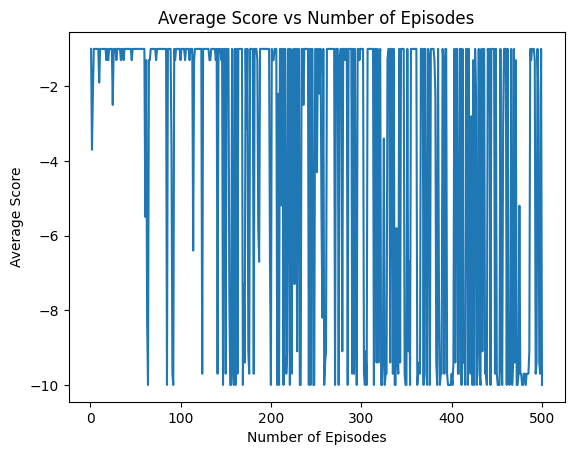

In [17]:
def taxi_dyna_q(env, planning_steps=5):
    alpha = 0.5  # learning rate
    gamma = 0.99  # discount factor
    epsilon = 0.1  # exploration rate
    max_epsilon = 1.0  # maximum exploration rate
    min_epsilon = 0.01  # minimum exploration rate
    decay_rate = 0.9  # exploration decay rate

    num_states = env.observation_space.n
    num_actions = env.action_space.n

    # Initialize Q-table and Model (Dyna-Q specific)
    Q = np.zeros((num_states, num_actions))
    model = {}  # Dictionary to store experience tuples (s, a, r, s')

    num_episodes = 500
    max_steps_per_episode = 30

    mean_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        env.render()
        total_reward = 0

        for step in range(max_steps_per_episode):
            # Choosing action using epsilon-greedy policy
            action = eps_greedy_q(Q, state, epsilon)

            # Taking action and observe next state and reward
            new_state, reward, done, _ = env.step(action)

            # Add experience to model (Dyna-Q specific)
            experience = (state, action, reward, new_state)
            model[experience] = reward  # Simple model, stores only reward

            # Planning steps (Dyna-Q specific)
            for _ in range(planning_steps):
                # Sample experience from model
                random_exp = random.choice(list(model.keys()))
                s, a, r, s_prime = random_exp

                # Dyna-Q update
                Q[s, a] += alpha * (r + gamma * np.max(Q[s_prime, :]) - Q[s, a])

            total_reward += reward
            state = new_state
            action = next_action = eps_greedy_q(Q, state, epsilon)  # Update action for next step (no separate next_action)
            print("Step:", step, "Reward:", reward)

            if done:
                break

        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

        # Calculate the mean reward per episode correctly
        mean_reward = total_reward / (step + 1)
        mean_rewards.append(mean_reward)

        print("Episode:", episode, "Mean Reward:", mean_reward, "\n")

    mean_reward = np.mean(mean_rewards)
    print(f"\nTotal number of episodes: {num_episodes}")
    print(f"Mean reward per episode: {mean_reward:.2f}")
    # Plot the graph
    plt.plot(range(1, num_episodes + 1), mean_rewards)
    plt.xlabel('Number of Episodes')
    plt.ylabel('Average Score')
    plt.title('Average Score vs Number of Episodes')
    plt.show()

    return Q, mean_rewards

final_Q, mean_rewards = taxi_dyna_q(env)
